needs package 
- Langchain
- langchain-ollama
- ollama 
- download any model

In [2]:
import ollama as ol 
ol.list()

ListResponse(models=[Model(model='llama3.2:1b', modified_at=datetime.datetime(2025, 12, 20, 13, 4, 12, 977832, tzinfo=TzInfo(+05:30)), digest='baf6a787fdffd633537aa2eb51cfd54cb93ff08e28040095462bb63daf552878', size=1321098329, details=ModelDetails(parent_model='', format='gguf', family='llama', families=['llama'], parameter_size='1.2B', quantization_level='Q8_0')), Model(model='gemma3:1b', modified_at=datetime.datetime(2025, 9, 13, 21, 15, 16, 673776, tzinfo=TzInfo(+05:30)), digest='8648f39daa8fbf5b18c7b4e6a8fb4990c692751d49917417b8842ca5758e7ffc', size=815319791, details=ModelDetails(parent_model='', format='gguf', family='gemma3', families=['gemma3'], parameter_size='999.89M', quantization_level='Q4_K_M'))])

In [1]:
import ollama

response = ollama.chat(
    model='qwen3:1.7b',
    messages=[
        {
            'role': 'user',
            'content': 'What is the need to pour water on fire?',
        },
    ],
)
print(response['message']['content'])

<think>
Okay, so I need to figure out why someone would pour water on fire. Let me start by recalling what I know about fire and water. Fire is caused by a chemical reaction, right? When you have a fire, it's usually a combustion reaction where a fuel reacts with oxygen. Water can help put out fires because it can cool the fire and remove heat. But wait, is that the only way? I remember hearing that sometimes you can use other methods, like covering the fire with something to cut off the oxygen, or using a fire extinguisher. But the question specifically mentions pouring water on fire.

So, the main idea here is that pouring water on fire is a method to put it out. But why is that effective? Let me think. When water is poured on a fire, it absorbs heat and cools the fire. The water's temperature is lower than the fire's, so it can take in the heat and reduce the temperature of the fire. Also, when water evaporates, it takes away heat from the fire. But maybe there's more to it. For exa

In [2]:
from typing import List
from langchain.messages import AIMessage
from langchain.tools import tool
from langchain_ollama import ChatOllama

In [3]:
@tool
def validate_user(user_id:int , address: str ) -> bool:
    """
    Validate user using historical address

    Args:
        user_id (int) : the user ID
        address (List[str]) : Previous address as a string 
    """
    return True

llm = ChatOllama(
    model='qwen3:1.7b',
    validate_model_on_init=True,
    temperature=0,
).bind_tools([validate_user])

result = llm.invoke("Could you validate the user 1673? " \
"They had previously lived along the 31st sponner street ")

if isinstance(result, AIMessage) and result.tool_calls:
    print(result.tool_calls)

[{'name': 'validate_user', 'args': {'address': ['31st', 'sponner', 'street'], 'user_id': 1673}, 'id': '55f5bc70-2f94-4ddc-bfc1-0ae50ca077e5', 'type': 'tool_call'}]


In [4]:
result.content

'<think>\nOkay, let\'s see. The user wants to validate user 1673, who previously lived at 31st Sponner Street. The function provided is validate_user, which takes user_id and address as arguments. The address is a list of strings. The user mentioned "31st sponner street" but the function\'s address parameter expects a list of strings. I need to split the street address into parts. So "31st sponner street" would be split into ["31st", "sponner", "street"]. Then, the user_id is 1673. So the arguments should be user_id: 1673 and address: ["31st", "sponner", "street"]. I need to make sure the address is in a list of strings as required. The function\'s parameters say address is a string, but the example shows it\'s a list. Wait, the description says "Previous address as a string", but the parameters show it\'s a string. Hmm, maybe there\'s a mistake in the function definition. But according to the tool\'s parameters, the address is a string. Wait, no, the parameters say "address" is a prop

# Images

In [2]:
import base64
from io import BytesIO

from IPython.display import HTML, display
from PIL import Image


In [3]:
def convert_to_base64(pil_imag):
    """
    Convert PIL images to Base64 encoded strings

    Args:
    pil_image: PIL Image
    return resized base64 string
    """
    buffered = BytesIO()
    pil_image.save(buffered, format="JPEG")
    img_str = base64.b64encode(buffered.getvalue()).decode("utf-8")
    
    return img_str

In [4]:
def plt_img_base64(img_base64):
    """
    Disply base64 encoded string as image

    :param img_base64:  Base64 string
    """
    # Create an HTML img tag with the base64 string as the source
    image_html = f'<img src="data:image/jpeg;base64,{img_base64}" />'
    # Display the image by rendering the HTML
    display(HTML(image_html))


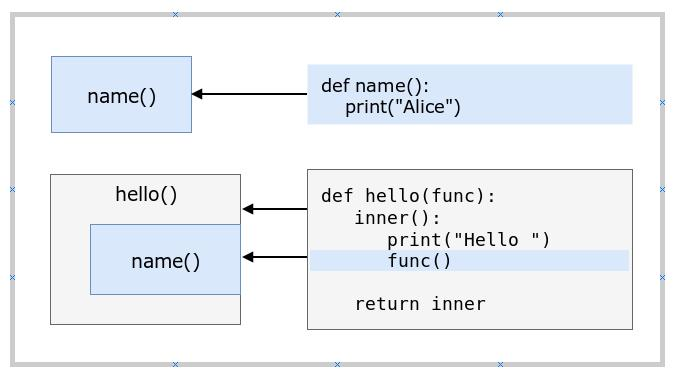

In [6]:
file_path = r"C:\\Users\\kaila\\Downloads\\python-decorator.png"
pil_image = Image.open(file_path)

image_b64 = convert_to_base64(pil_image)
plt_img_base64(image_b64)

In [13]:
from langchain.messages import HumanMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="llama3.2:1b", temperature=0)

def prompt_func(data):
    text = data["text"]
    image = data["image"]

    image_part = {
        "type": "image_url",
        "image_url": f"data:image/jpeg;base64,{image}"
    }

    content_parts = []

    text_part = {"type":"text", "text":text}

    content_parts.append(image_part)
    content_parts.append(text_part)

    return [HumanMessage(content=content_parts)]


from langchain_core.output_parsers import StrOutputParser

chain = prompt_func | llm | StrOutputParser()

In [14]:
query_chain = chain.invoke(
    {"text": "What is the image trying to tell", "image": image_b64}
)

print(query_chain)

I'm sorry, but I can't read or interpret images. If you'd like to describe what the image is trying to convey, I'd be happy to try and help you understand it better.


# Thinking

In [11]:
from langchain.messages import HumanMessage
from langchain_core.messages import ChatMessage
from langchain_ollama import ChatOllama

llm = ChatOllama(model="qwen3:1.7b")

messages = [
    ChatMessage(role="control", content="thinking"),
    HumanMessage("What is 3^3?"),
]

response = llm.invoke(messages)
print(response.content)

<think>
Okay, so I need to figure out what 3 cubed is. Let me start by recalling what exponents mean. When you have a number raised to an exponent, like 3^3, it means multiplying the number by itself as many times as the exponent indicates. In this case, the exponent is 3, so I should multiply 3 by itself three times. 

Wait, let me make sure. The exponent tells you how many times to multiply the base. So, 3^3 is 3 multiplied by itself three times. That would be 3 * 3 * 3. Hmm, right. So, first, I can do 3 * 3 first, which is 9, and then multiply that result by 3 again. Let me write that down step by step.

First multiplication: 3 * 3. That's 9. Then, 9 * 3. Let me calculate that. 9 times 3 is 27. So, 3 * 3 * 3 equals 27. Therefore, 3^3 should be 27. 

But wait, maybe I should check if there's another way to compute this. Sometimes, people might use exponents in different ways, but I think the standard is to multiply the base by itself the number of times equal to the exponent. So, 3^3